# METROPOLITAN MANILA TRAFFIC CONGESTION ANALYSIS IN RELATION TO OVERPOPULATION IN 2022

In [569]:
# Import libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import matplotlib.patheffects as PathEffects

import warnings
warnings.filterwarnings('ignore')

## DATA CLEANING AND VISUALIZATION FOR POPULATION DENSITY

In [570]:
population = pd.read_csv('https://raw.githubusercontent.com/Quiyoushi/Cognate-1-Lab/refs/heads/main/ph.csv')
population.head(5)

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Manila,14.5958,120.9772,Philippines,PH,Manila,primary,24922000,1780148
1,Quezon City,14.6500,121.0475,Philippines,PH,Quezon,admin,2960048,2960048
2,Zamboanga City,6.9042,122.0761,Philippines,PH,Zamboanga,admin,2100000,977234
3,Davao,7.0700,125.6000,Philippines,PH,Davao,admin,1776949,1776949
4,Caloocan City,14.6500,120.9700,Philippines,PH,Caloocan,admin,1661584,1661584


In [571]:
# Drop specified columns
population = population.drop(columns=['lat', 'lng', 'iso2', 'country', 'admin_name', 'capital', 'population_proper'])

# Sort the data by population in descending order
population = population.sort_values('population', ascending=False)

# Display the modified DataFrame
population.head(3)

,city,population
0,Manila,24922000
1,Quezon City,2960048
2,Zamboanga City,2100000


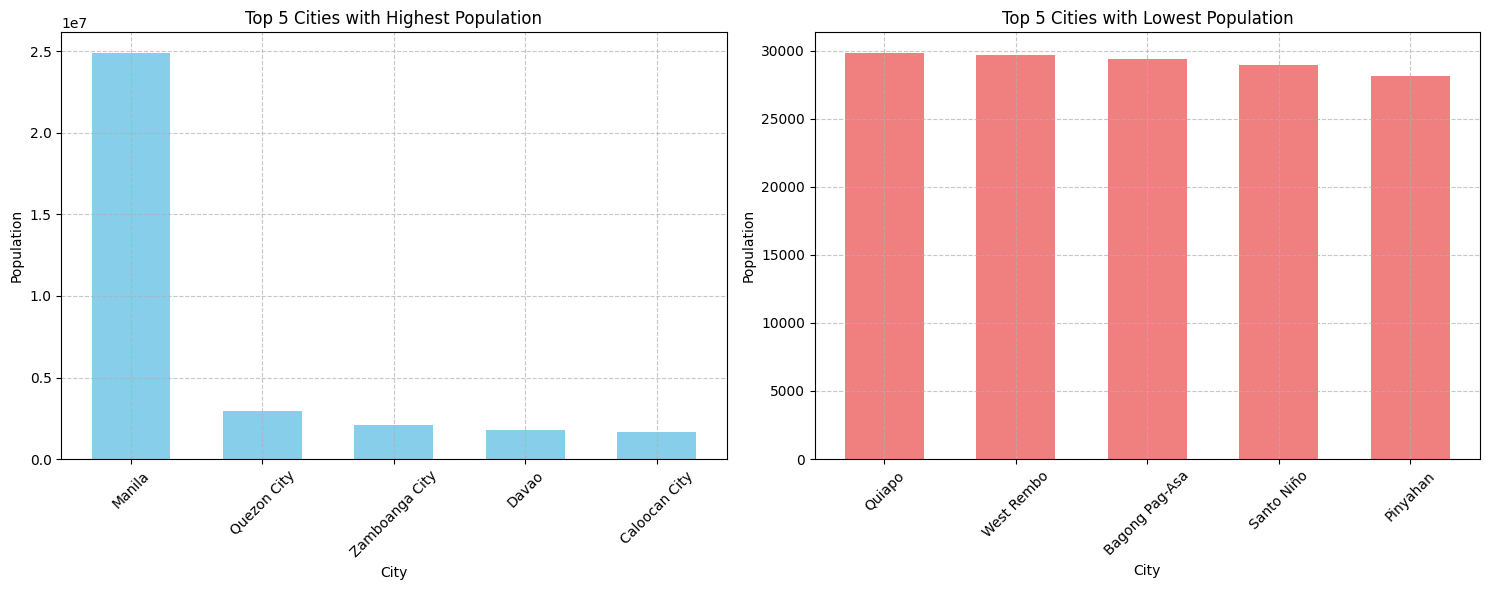

In [572]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Adjust figsize for better width

top_5_cities = population.head(5) # Select the top 5 cities
bottom_5_cities = population.tail(5) # Select the bottom 5 cities

# Plot for top 5 cities with color and grid
bars1 = ax1.bar(top_5_cities['city'], top_5_cities['population'], width=0.6, color='skyblue')
ax1.set_xlabel("City")
ax1.set_ylabel("Population")
ax1.set_title("Top 5 Cities with Highest Population")
ax1.tick_params(axis='x', labelrotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add population labels above the bars for top 5 cities

# Plot for bottom 5 cities with color and grid
bars2 = ax2.bar(bottom_5_cities['city'], bottom_5_cities['population'], width=0.6, color='lightcoral')
ax2.set_xlabel("City")
ax2.set_ylabel("Population")
ax2.set_title("Top 5 Cities with Lowest Population")
ax2.tick_params(axis='x', labelrotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add population labels above the bars for bottom 5 cities

plt.tight_layout()  #
plt.show()

## DATA CLEANING AND VISUALIZATION FOR TOTAL VEHICLES IN MANILA

In [573]:
vehicles = pd.read_csv('https://raw.githubusercontent.com/Quiyoushi/Cognate-1-Lab/refs/heads/main/Circumferential_and_Radial_Road_Volumes.csv')
vehicles.head(3)

,Circumferencial and Radial Road,CAR,PUJ,UV,TAXI,PUB,Truck,Trailer,MC,Tricycle,Total
0,RECTO,24747,7269,727,1678,593,666,115,49046,2190,87391
1,MENDOZA,57755,11,11,3,6,706,1218,74200,1922,145235
2,PRES. QUIRINO AVE.,17916,727,727,106,593,706,1251,88445,2420,177881


In [574]:
# Remove unnecessary columns
vehicles = vehicles.drop(columns=['Circumferencial and Radial Road', 'Total'])

# Calculate the sum of each column
column_sums = vehicles.sum()

# Add a row for the total
vehicles.loc['Total'] = column_sums

# Display the modified dataframe
vehicles.head(3)

,CAR,PUJ,UV,TAXI,PUB,Truck,Trailer,MC,Tricycle
0,24747,7269,727,1678,593,666,115,49046,2190
1,57755,11,11,3,6,706,1218,74200,1922
2,17916,727,727,106,593,706,1251,88445,2420


In [575]:
cv = pd.read_csv('https://raw.githubusercontent.com/Quiyoushi/Cognate-1-Lab/refs/heads/main/Circumferential_and_Radial_Roads_With_Cities.csv')
cv.head(3)

,Closest City,CAR,PUJ,UV,TAXI,PUB,TRUCK,TRAILER,MC,TRICYCLE,TOTAL
0,Manila,24747,7269,727,1678,593,666,115,49046,2190,87391
1,Manila,57755,11,11,302,706,1218,74,74200,2,145235
2,QuezonCity,72782,15,15,38,24,1251,88,88445,2420,177881


In [576]:
# Group data by 'Closest City' and sum the numerical columns
cv_grouped = cv.groupby('Closest City').sum()

# Display the grouped data
cv_grouped.head(3)

,CAR,PUJ,UV,TAXI,PUB,TRUCK,TRAILER,MC,TRICYCLE,TOTAL
Closest City,,,,,,,,,,
KalookanCity,142007,681,322,440,885,35,46,38787,3,121683
Mandaluyong,216934,1470,2504,1051,3824,2533,110,164673,1320,407342
Manila,277033,34068,11104,12179,9301,6321,1318,356899,6878,850342


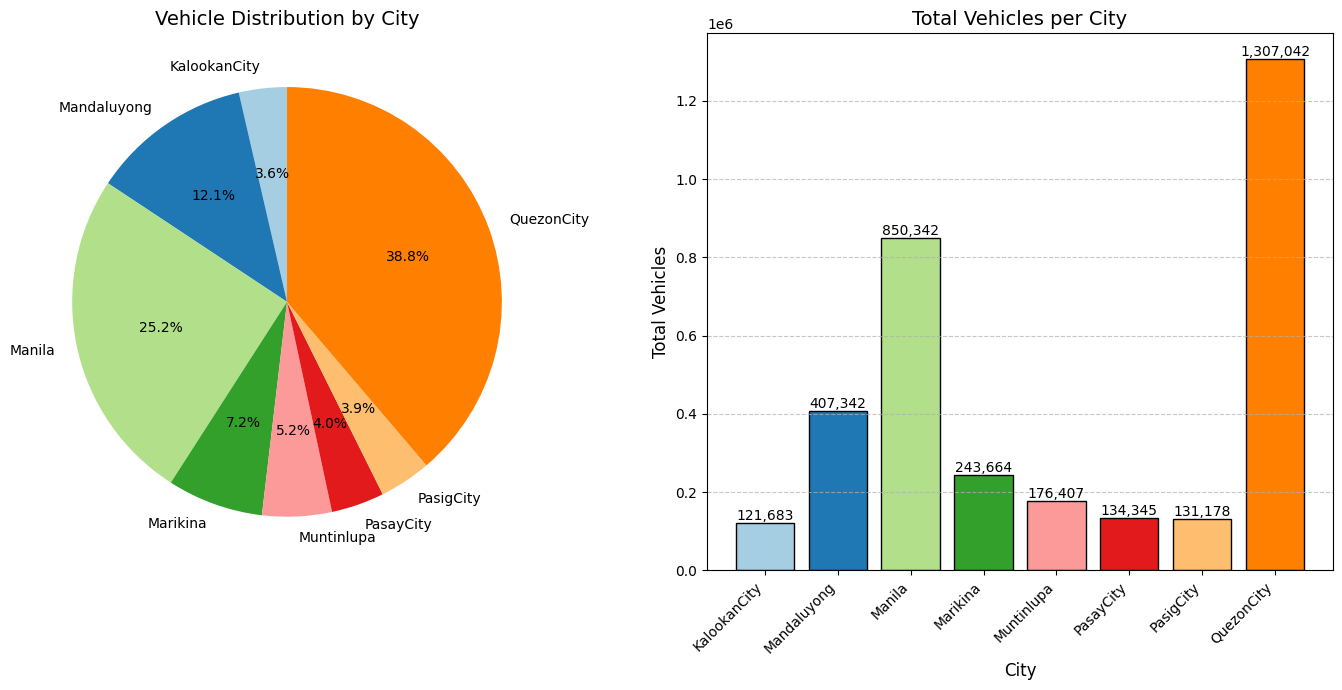

In [577]:
city_totals = cv.groupby('Closest City')['TOTAL'].sum()

# Create the pie chart and bar chart
plt.figure(figsize=(14, 7))  # Adjust figure size

# Subplot for the pie chart
plt.subplot(1, 2, 1)
plt.pie(
    city_totals,
    labels=city_totals.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Vehicle Distribution by City', fontsize=14)

# Subplot for the bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(
    city_totals.index,
    city_totals.values,
    color=plt.cm.Paired.colors,
    edgecolor='black'
)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Vehicles", fontsize=12)
plt.title('Total Vehicles per City', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels

# Add gridlines to the bar chart
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center', va='bottom', fontsize=10
    )

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


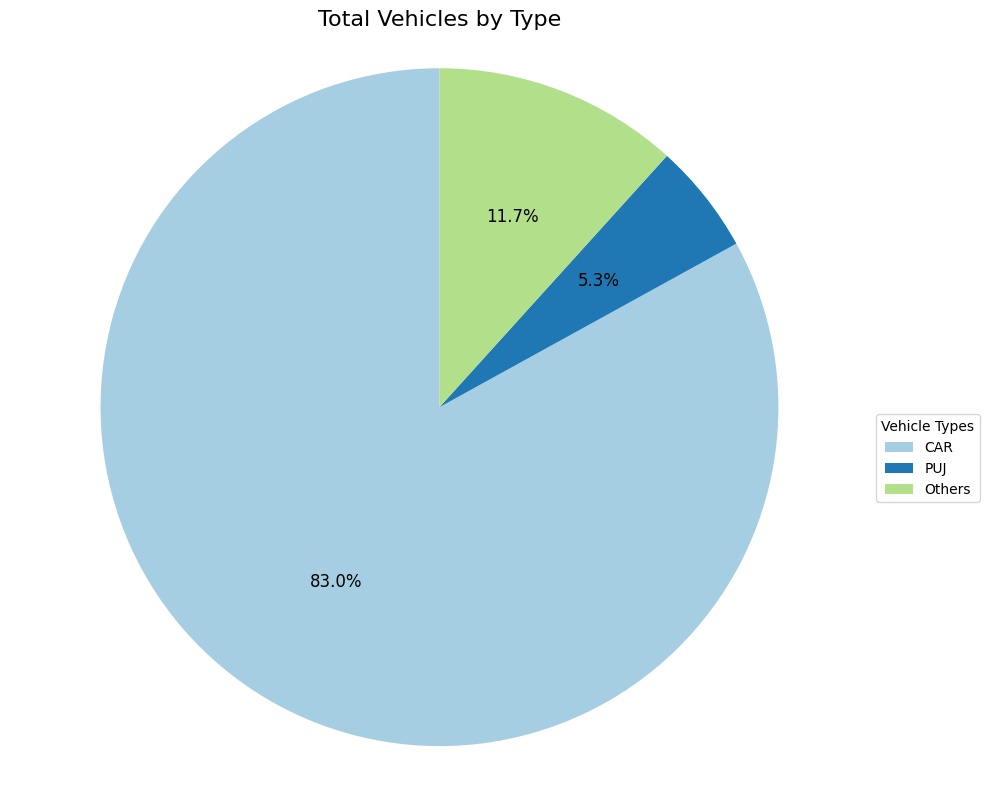

In [578]:
# Calculate the sum of each column
sums = vehicles.sum()

# Create a new dataframe for plotting
plot_data = pd.DataFrame({'Vehicle': sums.index, 'Total': sums.values})

# Remove the highest amount
plot_data = plot_data.sort_values(by="Total", ascending=False)
plot_data = plot_data.iloc[1:, :]

# Combine smaller slices into an "Others" category
threshold = 0.05 * plot_data['Total'].sum()  # Combine slices less than 5% of total
small_slices = plot_data[plot_data['Total'] < threshold]
other_total = small_slices['Total'].sum()
plot_data = plot_data[plot_data['Total'] >= threshold]
if other_total > 0:
    plot_data = pd.concat([plot_data, pd.DataFrame({'Vehicle': ['Others'], 'Total': [other_total]})])

# Improve readability with better visualization
plt.figure(figsize=(10, 8))

# Define a color palette
colors = plt.cm.Paired(range(len(plot_data)))

# Plot the pie chart
wedges, texts, autotexts = plt.pie(
    plot_data['Total'],
    labels=None,  # Disable direct labels on the chart
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},  # Adjust text font size
    labeldistance=1.2  # Adjust label distance for less overlap
)

# Add a legend for labels
plt.legend(wedges, plot_data['Vehicle'], title="Vehicle Types", loc="best", bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title("Total Vehicles by Type", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

## DATA CLEANING AND MAPPING OF DATASETS

In [579]:
gdf = gpd.read_file('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/gadm41_PHL_2.json')
gdf.head(3)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PHL.1.1_1,PHL,Philippines,PHL.1_1,Abra,NA,Bangued,NA,NA,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.6113 17.4956, 120.6055 17...."
1,PHL.1.2_1,PHL,Philippines,PHL.1_1,Abra,NA,Boliney,NA,NA,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"MULTIPOLYGON (((120.814 17.3421, 120.7686 17.3..."
2,PHL.1.3_1,PHL,Philippines,PHL.1_1,Abra,NA,Bucay,NA,NA,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"MULTIPOLYGON (((120.6777 17.4574, 120.6732 17...."


In [580]:
# Filter columns that contain "Metropolitan Manila"
metropolitan_manila_gdf = gdf[gdf['NAME_1'] == 'MetropolitanManila']
metropolitan_manila_gdf.head(3)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
960,PHL.47.1_1,PHL,Philippines,PHL.47_1,MetropolitanManila,NA,KalookanCity,NA,NA,Lungsod|Siyudad,City,137501,PH.MM.KL,"MULTIPOLYGON (((120.9763 14.6357, 120.9704 14...."
961,PHL.47.2_1,PHL,Philippines,PHL.47_1,MetropolitanManila,NA,LasPiñas,"LasPiñas,Cityof",NA,Lungsod|Siyudad,City,137601,PH.MM.LP,"MULTIPOLYGON (((121.0121 14.3813, 121.0088 14...."
962,PHL.47.3_1,PHL,Philippines,PHL.47_1,MetropolitanManila,NA,MakatiCity,"Makati,Cityof",NA,Lungsod|Siyudad,City,137602,PH.MM.MK,"MULTIPOLYGON (((121.0341 14.5687, 121.0487 14...."


In [581]:
# Keep only the 'NAME_2' and 'geometry' columns
metropolitan_manila_gdf_cleaned = metropolitan_manila_gdf[['NAME_1', 'NAME_2', 'geometry']]
# Display the modified DataFrame
metropolitan_manila_gdf_cleaned.head(3)

,NAME_1,NAME_2,geometry
960,MetropolitanManila,KalookanCity,"MULTIPOLYGON (((120.9763 14.6357, 120.9704 14...."
961,MetropolitanManila,LasPiñas,"MULTIPOLYGON (((121.0121 14.3813, 121.0088 14...."
962,MetropolitanManila,MakatiCity,"MULTIPOLYGON (((121.0341 14.5687, 121.0487 14...."


##

In [582]:
populationcity = gpd.read_file('https://raw.githubusercontent.com/Quiyoushi/Cognate-1-Lab/refs/heads/main/City_Data_Population%20(1)%20(1).csv')
populationcity.head(3)

,City,10 Digit Code,Correspondence Code,Income Class,Population (2020 Census)
0,KalookanCity,1380100000,137501000,1st,1661584
1,LasPiñas,1380200000,137601000,1st,606293
2,MakatiCity,1380300000,137602000,1st,629616


In [583]:
# Keep only the specified columns
populationcity = populationcity[['City', 'Population (2020 Census)']]
# Display the updated dataframe
populationcity.head(3)

,City,Population (2020 Census)
0,KalookanCity,1661584
1,LasPiñas,606293
2,MakatiCity,629616


In [584]:
# Rename the 'City' column in populationcity to 'NAME_2' for merging
populationcity.rename(columns={'City': 'NAME_2'}, inplace=True)

# Merge the two dataframes based on the 'NAME_2' column
# First merge populationcity and metropolitan_manila_gdf_cleaned
merge_dfff = pd.merge(populationcity, metropolitan_manila_gdf_cleaned, on='NAME_2', how='inner')

# Select the desired columns
merge_dfff = merge_dfff[['NAME_2', 'Population (2020 Census)', 'geometry']]

# Display the first few rows of the merged dataframe
merge_dfff

,NAME_2,Population (2020 Census),geometry
0,KalookanCity,1661584,"MULTIPOLYGON (((120.9763 14.6357, 120.9704 14...."
1,LasPiñas,606293,"MULTIPOLYGON (((121.0121 14.3813, 121.0088 14...."
2,MakatiCity,629616,"MULTIPOLYGON (((121.0341 14.5687, 121.0487 14...."
3,Malabon,380522,"MULTIPOLYGON (((120.9455 14.6813, 120.9519 14...."
4,Mandaluyong,425758,"MULTIPOLYGON (((121.0341 14.5687, 121.0149 14...."
5,Manila,1846131,"MULTIPOLYGON (((120.9983 14.5645, 120.9967 14...."
6,Marikina,456059,"MULTIPOLYGON (((121.1026 14.6298, 121.1017 14...."
7,Muntinlupa,543445,"MULTIPOLYGON (((121.0092 14.3691, 121.0126 14...."
8,Parañaque,689992,"MULTIPOLYGON (((121.0234 14.4356, 121.0152 14...."
9,PasayCity,440656,"MULTIPOLYGON (((121.0001 14.5097, 120.9985 14...."


In [585]:
# Reset the index of cv_grouped to make 'Closest City' a regular column again
cv_grouped = cv_grouped.reset_index()

# Rename 'Closest City' column to 'NAME_2' to align with merge_dfff
cv_grouped.rename(columns={'Closest City': 'NAME_2'}, inplace=True)

# Now perform the merge
merge_dfff = pd.merge(
    merge_dfff,
    cv_grouped,
    on=['NAME_2'],
    how='left'
)
merge_dfff.head(3)

,NAME_2,Population (2020 Census),geometry,CAR,PUJ,UV,TAXI,PUB,TRUCK,TRAILER,MC,TRICYCLE,TOTAL
0,KalookanCity,1661584,"MULTIPOLYGON (((120.9763 14.6357, 120.9704 14....",142007.0,681.0,322.0,440.0,885.0,35.0,46.0,38787.0,3.0,121683.0
1,LasPiñas,606293,"MULTIPOLYGON (((121.0121 14.3813, 121.0088 14....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MakatiCity,629616,"MULTIPOLYGON (((121.0341 14.5687, 121.0487 14....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [586]:
# Convert the 'geometry' column to a GeoSeries
merge_dfff['geometry'] = gpd.GeoSeries(merge_dfff['geometry'])

# Ensure merge_dfff is a GeoDataFrame
merge_dfff = gpd.GeoDataFrame(merge_dfff, geometry='geometry')

# Now you can calculate centroids
merge_dfff['centroid_x'] = merge_dfff['geometry'].centroid.x
merge_dfff['centroid_y'] = merge_dfff['geometry'].centroid.y

merge_dfff.head(3)

,NAME_2,Population (2020 Census),geometry,CAR,PUJ,UV,TAXI,PUB,TRUCK,TRAILER,MC,TRICYCLE,TOTAL,centroid_x,centroid_y
0,KalookanCity,1661584,"MULTIPOLYGON (((120.9763 14.6357, 120.9704 14....",142007.0,681.0,322.0,440.0,885.0,35.0,46.0,38787.0,3.0,121683.0,121.033179,14.724502
1,LasPiñas,606293,"MULTIPOLYGON (((121.0121 14.3813, 121.0088 14....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.993953,14.442817
2,MakatiCity,629616,"MULTIPOLYGON (((121.0341 14.5687, 121.0487 14....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.033553,14.549369


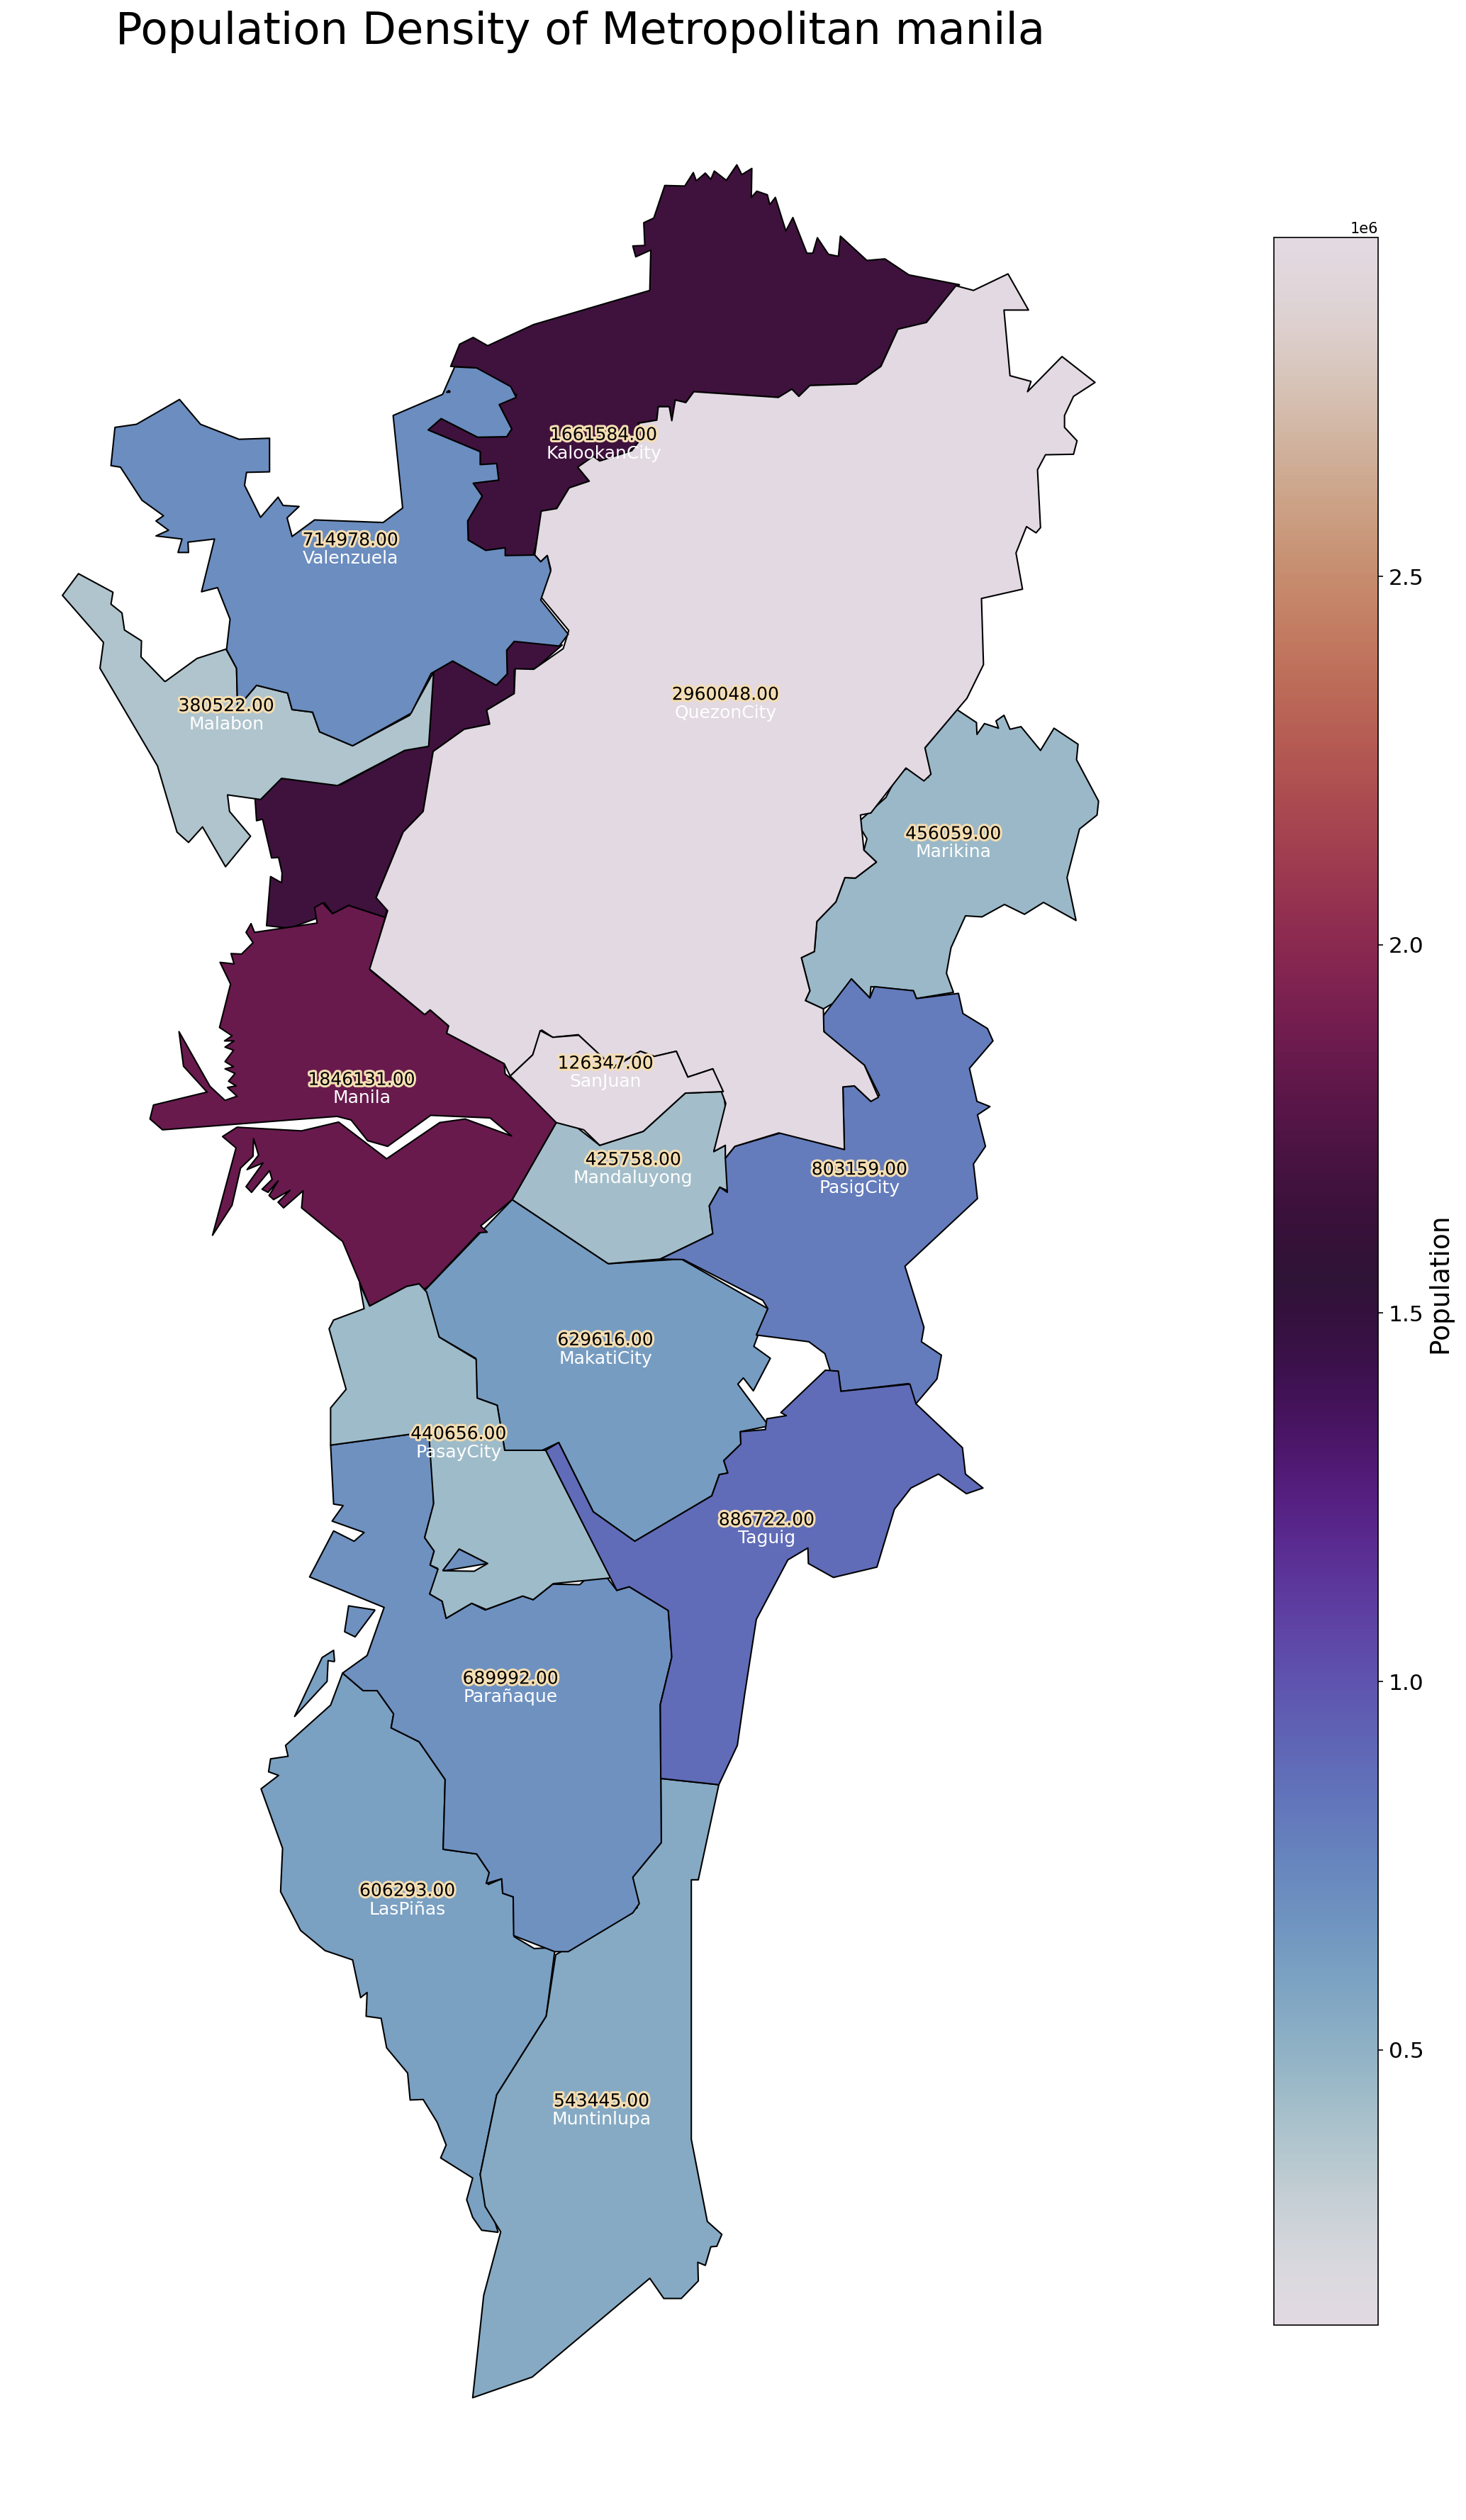

In [587]:
# Convert 'Population (2020 Census)' to numeric before plotting
merge_dfff['Population (2020 Census)'] = pd.to_numeric(merge_dfff['Population (2020 Census)'])

# Normalize Poverty_Incidence for Color Mapping
norm = plt.Normalize(vmin=merge_dfff['Population (2020 Census)'].min(), vmax=merge_dfff['Population (2020 Census)'].max())
cmap = plt.cm.twilight  # color maps

# Plot the map with poverty incidence heatmap
fig, ax = plt.subplots(figsize=(30, 30), dpi=150)
merge_dfff.plot(ax=ax, color=merge_dfff['Population (2020 Census)'].map(lambda x: cmap(norm(x))), edgecolor='black', linewidth=1)

# Annotate the municipalities using 'NAME_2' column instead of 'LGU'
for idx, row in merge_dfff.iterrows():
    ax.annotate(text=row['NAME_2'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12, color='white')

# Add an arrow annotation for poverty incidence
for idx, row in merge_dfff.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(f"{row['Population (2020 Census)']:.2f}",
                xy=(centroid.x, centroid.y + 0.0045),
                ha = 'center', va = 'center',
                fontsize = 12, color='black', path_effects=[PathEffects.withStroke(linewidth=3, foreground='wheat')])

# Create colorbar as legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, aspect = 20, shrink = 0.85)
cbar.set_label('Population ', fontsize = 18)
cbar.ax.tick_params(labelsize = 15)

ax.set_title('Population Density of Metropolitan manila', fontsize = 30, loc = 'center')
ax.axis('off')

plt.show()

In [588]:
# Constant Coordinates
latitude = 14.61314
longitude = 120.98973

# Map instantiation
m = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='OpenStreetMap', name='Open Street Map')

# Choropleth Layer for Population
cmci_choropleth = folium.Choropleth(
    name='Population (2020 Census)',
    geo_data=merge_dfff.to_json(),
    data=merge_dfff,
    legend_name='Population (2020 Census)',
    columns=['NAME_2', 'Population (2020 Census)'],
    key_on='feature.properties.NAME_2',
    fill_color='PuBu',
    fill_opacity=0.8,
    show=True
).add_to(m)

# List of transport-related columns
transport_columns = ['CAR', 'PUJ', 'UV', 'TAXI', 'PUB', 'TRUCK', 'TRAILER', 'MC', 'TRICYCLE']

# Strip column names to avoid leading/trailing spaces
merge_dfff.columns = merge_dfff.columns.str.strip()

# Check if transport columns exist in merge_dff
transport_columns = [col for col in transport_columns if col in merge_dfff.columns]

# Add missing columns with default values if necessary
for col in ['CAR', 'PUJ', 'UV', 'TAXI', 'PUB', 'TRUCK', 'TRAILER', 'MC', 'TRICYCLE']:
    if col not in merge_dfff.columns:
        merge_dfff[col] = 0  # Default value for missing columns

# Loop through each column and create a Choropleth layer
for column in transport_columns:
    folium.Choropleth(
        name=f'{column} Distribution',  # Layer name for transport type
        geo_data=merge_dfff.to_json(),  # GeoJSON data
        data=merge_dfff,  # DataFrame containing the data
        columns=['NAME_2', column],  # Columns for NAME_2 and transport type
        key_on='feature.properties.NAME_2',  # Match GeoJSON property
        fill_color='YlOrRd',  # Color scheme
        fill_opacity=0.8,  # Transparency for filled areas
        line_opacity=0.2,  # Transparency for boundaries
        legend_name=f'{column} Count',  # Dynamic legend for each transport type
        show=False  # Default visibility (off)
    ).add_to(m)

    # Add tooltips to show transport type and count when hovering over each city
    folium.GeoJson(
        data=merge_dfff.to_json(),
        name=f'{column} Tooltip',
        tooltip=folium.GeoJsonTooltip(
            fields=['NAME_2', column],  # Fields to display in tooltip
            aliases=['City: ', f'Total {column}: '],  # Aliases for better readability
            labels=True,
            sticky=True,
            min_width=200,
            parse_html=True
        ),
        style_function=lambda x: {
            'fillColor': 'white',  # Color scheme for tooltips background
            'fillOpacity': 0.1,
            'color': 'black',  # Border color for the feature
            'weight': 1  # Border weight
        }
    ).add_to(m)


# Add GeoJSON Tooltip
tooltips = folium.GeoJson(
    data=merge_dfff.to_json(),
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME_2', 'Population (2020 Census)'],
        aliases=['CITY:', 'Population:']
    ),
    style_function=lambda x: {
        'fillColor': '#ffffff00',  # Transparent fill
        'fillOpacity': 0.1,
        'color': 'black',          # Black border color
        'weight': 1                # Border thickness
    }
)

cmci_choropleth.add_child(tooltips)

# Add additional tile layers
folium.TileLayer('cartodbpositron', name='CartoDB Positron', show=False).add_to(m)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='© Esri, Maxar, Earthstar Geographics, and the GIS User Community',
    name='Esri World Imagery',
    show=False
).add_to(m)

# Cities sorted
cities = merge_dfff['NAME_2'].sort_values().to_list()

# Function to add a city-specific layer
def add_city_layer(merge_dfff, city_name, map_obj):
    # Filter data for the city
    city_data = merge_dfff[merge_dfff['NAME_2'] == city_name]

    # Add GeoJSON layer for the city
    folium.GeoJson(
        data=city_data.to_json(),
        name=city_name,  # Layer name
        overlay=True,
        popup=folium.GeoJsonPopup(
            fields=['NAME_2', 'Population (2020 Census)'],
            aliases=['City: ', 'Population: '],
            labels=True,
            sticky=True,
            min_width=300,
            parse_html=True,
            direction='top'
        ),
        show=False,
        style_function=lambda x: {
            'color': 'red',
            'weight': 1,
            'dashArray': '5, 5'
        }
    ).add_to(map_obj)

# Add a layer for each city
for city in cities:
    add_city_layer(merge_dfff, city, m)

top_5_data = merge_dfff.sort_values(by = 'Population (2020 Census)').head(5)
top_ranked = top_5_data['Population (2020 Census)'].min() # 1

# Feature Groups

fg_centroid_top_10 = folium.FeatureGroup(name = 'Top 5 LEAST POPULATED Cities', show = False)

for _, row in top_5_data.iterrows():

  folium.Marker(

    location = [row['geometry'].centroid.y, row['geometry'].centroid.x],
    popup = folium.Popup(f"{row['NAME_2']}: Population (2020 Census) - {row['Population (2020 Census)']}", max_width = 300),
    icon = folium.Icon(color  = 'blue')

  ).add_to(fg_centroid_top_10)

# Add Feature Groups to Map
fg_centroid_top_10.add_to(m)

# Add Layer Control to the map
folium.LayerControl().add_to(m)

# Display the map
m.save('transport_map.html')

m